In [78]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

def search_col(tab,key):
    for cols in tab.columns:
        if (cols.find(key)>-1):
            print(cols)


2.2.0


In [79]:
def remove_rows_with_repeated_keys(table: Table, key_column: str) -> Table:
    # Count occurrences of each key
    keys, counts = np.unique(table[key_column], return_counts=True)
    
    # Find keys that are unique (count == 1)
    unique_keys = keys[counts == 1]
    
    # Create a mask to keep only rows with unique keys
    mask = np.isin(table[key_column], unique_keys)
    
    # Return filtered table
    return table[mask]

def drop_later_duplicates_keep_first(table: Table, key_column: str) -> Table:
    seen = set()
    keep_rows = []

    for i, key in enumerate(table[key_column]):
        if key not in seen:
            seen.add(key)
            keep_rows.append(i)

    return table[keep_rows]

In [80]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })

In [81]:
tab_pe = Table.read('tables/KG_Pipe3D_table.fits')
print(len(tab_pe))

451


In [82]:
tab_pe.colnames

['name',
 'cubename',
 'KGAS_ID',
 'IAUNAME',
 'FoV',
 'Re_kpc',
 'e_log_Mass',
 'log_SFR_Ha',
 'e_log_SFR_Ha',
 'log_Mass',
 'log_SFR_ssp',
 'log_NII_Ha_cen',
 'e_log_NII_Ha_cen',
 'log_OIII_Hb_cen',
 'e_log_OIII_Hb_cen',
 'log_SII_Ha_cen',
 'e_log_SII_Ha_cen',
 'log_OII_Hb_cen',
 'e_log_OII_Hb_cen',
 'EW_Ha_cen',
 'e_EW_Ha_cen',
 'ZH_LW_Re_fit',
 'e_ZH_LW_Re_fit',
 'alpha_ZH_LW_Re_fit',
 'e_alpha_ZH_LW_Re_fit',
 'ZH_MW_Re_fit',
 'e_ZH_MW_Re_fit',
 'alpha_ZH_MW_Re_fit',
 'e_alpha_ZH_MW_Re_fit',
 'Age_LW_Re_fit',
 'e_Age_LW_Re_fit',
 'alpha_Age_LW_Re_fit',
 'e_alpha_Age_LW_Re_fit',
 'Age_MW_Re_fit',
 'e_Age_MW_Re_fit',
 'alpha_Age_MW_Re_fit',
 'e_alpha_Age_MW_Re_fit',
 'Re_arc',
 'DL',
 'DA',
 'PA',
 'ellip',
 'log_Mass_gas',
 'vel_sigma_Re',
 'e_vel_sigma_Re',
 'log_SFR_SF',
 'log_SFR_D_C',
 'OH_O3N2_cen',
 'e_OH_O3N2_cen',
 'OH_N2_cen',
 'e_OH_N2_cen',
 'OH_ONS_cen',
 'e_OH_ONS_cen',
 'OH_R23_cen',
 'e_OH_R23_cen',
 'OH_pyqz_cen',
 'e_OH_pyqz_cen',
 'OH_t2_cen',
 'e_OH_t2_cen',
 'OH_

In [83]:
col = np.array(tab_pe.colnames)
col

array(['name', 'cubename', 'KGAS_ID', 'IAUNAME', 'FoV', 'Re_kpc',
       'e_log_Mass', 'log_SFR_Ha', 'e_log_SFR_Ha', 'log_Mass',
       'log_SFR_ssp', 'log_NII_Ha_cen', 'e_log_NII_Ha_cen',
       'log_OIII_Hb_cen', 'e_log_OIII_Hb_cen', 'log_SII_Ha_cen',
       'e_log_SII_Ha_cen', 'log_OII_Hb_cen', 'e_log_OII_Hb_cen',
       'EW_Ha_cen', 'e_EW_Ha_cen', 'ZH_LW_Re_fit', 'e_ZH_LW_Re_fit',
       'alpha_ZH_LW_Re_fit', 'e_alpha_ZH_LW_Re_fit', 'ZH_MW_Re_fit',
       'e_ZH_MW_Re_fit', 'alpha_ZH_MW_Re_fit', 'e_alpha_ZH_MW_Re_fit',
       'Age_LW_Re_fit', 'e_Age_LW_Re_fit', 'alpha_Age_LW_Re_fit',
       'e_alpha_Age_LW_Re_fit', 'Age_MW_Re_fit', 'e_Age_MW_Re_fit',
       'alpha_Age_MW_Re_fit', 'e_alpha_Age_MW_Re_fit', 'Re_arc', 'DL',
       'DA', 'PA', 'ellip', 'log_Mass_gas', 'vel_sigma_Re',
       'e_vel_sigma_Re', 'log_SFR_SF', 'log_SFR_D_C', 'OH_O3N2_cen',
       'e_OH_O3N2_cen', 'OH_N2_cen', 'e_OH_N2_cen', 'OH_ONS_cen',
       'e_OH_ONS_cen', 'OH_R23_cen', 'e_OH_R23_cen', 'OH_pyqz_cen',
    

In [84]:
#plt.scatter(tab_pe['log_Mass'],np.log10(tab_pe['DL']),s=1)

In [85]:
from astropy.table import Table

# Extract column names from the table
column_names = Table([tab_pe.colnames], names=['Column Names'])

# Write the column names to an ASCII file
column_names.write('column_names.txt', format='ascii', overwrite=True)

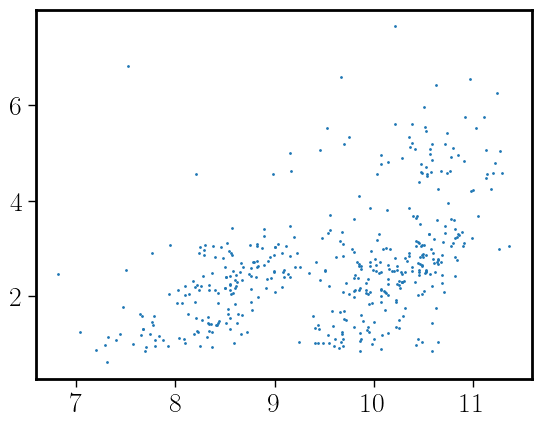

In [86]:
plt.scatter(tab_pe['log_Mass_phot'],tab_pe['T90'],s=1)

In [87]:
from astropy.cosmology import LambdaCDM

# Define the cosmology parameters
h = 0.71  # Hubble constant in units of 100 km/s/Mpc
omega_m = 0.27  # Matter density parameter
omega_lambda = 0.73  # Dark energy density parameter

# Create a custom cosmology
custom_cosmo = LambdaCDM(H0=h * 100, Om0=omega_m, Ode0=omega_lambda)
z = 0.5
# Compute the luminosity distance for a redshift z
luminosity_distance = custom_cosmo.luminosity_distance(z)

print(f"Luminosity Distance at z={z}: {luminosity_distance}")

Luminosity Distance at z=0.5: 2822.7051033477137 Mpc


In [88]:
# Define the cosmology parameters
h = 0.71  # Hubble constant in units of 100 km/s/Mpc
omega_m = 0.27  # Matter density parameter
omega_lambda = 0.73  # Dark energy density parameter
my_cosmo = LambdaCDM(H0=h * 100, Om0=omega_m, Ode0=omega_lambda)

h = 0.7  # Hubble constant in units of 100 km/s/Mpc
omega_m = 0.3  # Matter density parameter
omega_lambda = 0.7  # Dark energy density parameter
KG_cosmo = LambdaCDM(H0=h * 100, Om0=omega_m, Ode0=omega_lambda)


In [89]:
#DL_my = my_cosmo.luminosity_distance(tab_pe['z'])

In [90]:
tab_pe.colnames

['name',
 'cubename',
 'KGAS_ID',
 'IAUNAME',
 'FoV',
 'Re_kpc',
 'e_log_Mass',
 'log_SFR_Ha',
 'e_log_SFR_Ha',
 'log_Mass',
 'log_SFR_ssp',
 'log_NII_Ha_cen',
 'e_log_NII_Ha_cen',
 'log_OIII_Hb_cen',
 'e_log_OIII_Hb_cen',
 'log_SII_Ha_cen',
 'e_log_SII_Ha_cen',
 'log_OII_Hb_cen',
 'e_log_OII_Hb_cen',
 'EW_Ha_cen',
 'e_EW_Ha_cen',
 'ZH_LW_Re_fit',
 'e_ZH_LW_Re_fit',
 'alpha_ZH_LW_Re_fit',
 'e_alpha_ZH_LW_Re_fit',
 'ZH_MW_Re_fit',
 'e_ZH_MW_Re_fit',
 'alpha_ZH_MW_Re_fit',
 'e_alpha_ZH_MW_Re_fit',
 'Age_LW_Re_fit',
 'e_Age_LW_Re_fit',
 'alpha_Age_LW_Re_fit',
 'e_alpha_Age_LW_Re_fit',
 'Age_MW_Re_fit',
 'e_Age_MW_Re_fit',
 'alpha_Age_MW_Re_fit',
 'e_alpha_Age_MW_Re_fit',
 'Re_arc',
 'DL',
 'DA',
 'PA',
 'ellip',
 'log_Mass_gas',
 'vel_sigma_Re',
 'e_vel_sigma_Re',
 'log_SFR_SF',
 'log_SFR_D_C',
 'OH_O3N2_cen',
 'e_OH_O3N2_cen',
 'OH_N2_cen',
 'e_OH_N2_cen',
 'OH_ONS_cen',
 'e_OH_ONS_cen',
 'OH_R23_cen',
 'e_OH_R23_cen',
 'OH_pyqz_cen',
 'e_OH_pyqz_cen',
 'OH_t2_cen',
 'e_OH_t2_cen',
 'OH_

In [91]:
search_col(tab_pe,'nsa')

In [92]:
tab_KG_glob = ascii.read('tables/KILOGAS_global_catalog_SAMImeasures.csv')
print(len(tab_KG_glob))

452


In [93]:
tab_KG_glob.colnames

['KGAS_ID',
 'ID_1',
 'SURVEY',
 'RA',
 'DEC',
 'Z',
 'LOGMSTAR_GSWLC',
 'LOGMSTAR_ERR_GSWLC',
 'LOGSFR_GSWLC',
 'LOGSFR_ERR_GSWLC',
 'LOGMSTAR_SDSS',
 'LOGSFR_SDSS',
 'LOGMSTAR_BEST',
 'LOGSFR_BEST',
 'N2HA',
 'O3HB',
 'BALMER',
 'BALMER_ERR',
 'Z_PP04_N2',
 'Z_PP04_O3N2',
 'AGNCLASS',
 'SERSIC',
 'R50_ARCSEC',
 'R90_ARCSEC',
 'R50_KPC',
 'SIZE_REF',
 'FLAG_ALMAQUEST',
 'FLAG_EDGE',
 'FLAG_SAMIALMA',
 'FLAG_ALMAARCHIVE',
 'FLAG_PACS',
 'FLAG_SPIRE',
 'FLAG_HELP',
 'FLAG_NVSS',
 'FLUX_20CM',
 'FLUX_20CM_ERR',
 'FLAG_WISE',
 'FLAG_HI',
 'HIREF',
 'LOGMHI',
 'ArrayConfig',
 'SB_num',
 'IAUname',
 'RE',
 'N_SERSIC',
 'Z_SPEC',
 'epsMGE_Re',
 'PA_PHOT']

In [94]:
tab_KG_sel = tab_KG_glob['KGAS_ID',
 'ID_1',
 'SURVEY',
 'RA',
 'DEC',
 'Z']

In [95]:
tab_KG_sel

KGAS_ID,ID_1,SURVEY,RA,DEC,Z
int64,str8,str5,float64,float64,float64
1,1-178894,MANGA,314.5881042480469,-0.35113999247550964,0.05285
2,1-179173,MANGA,314.5533752441406,-0.3243899941444397,0.05264
3,1-179071,MANGA,313.7587890625,-0.039969999343156815,0.05249
4,1-178794,MANGA,310.8828430175781,0.963379979133606,0.05089
5,1-54940,MANGA,144.53671264648438,1.4491599798202515,0.04578
6,1-277,MANGA,146.51539611816406,0.16681000590324402,0.04892
7,1-55227,MANGA,146.57606506347656,2.8843400478363037,0.04746
8,1-954,MANGA,149.20582580566406,1.1205099821090698,0.04705
9,1-383,MANGA,149.11256408691406,0.12973999977111816,0.04579


In [96]:
tab_pe_sel = join(tab_pe, tab_KG_sel, keys='KGAS_ID', join_type='left')
print(len(tab_pe_sel))

451


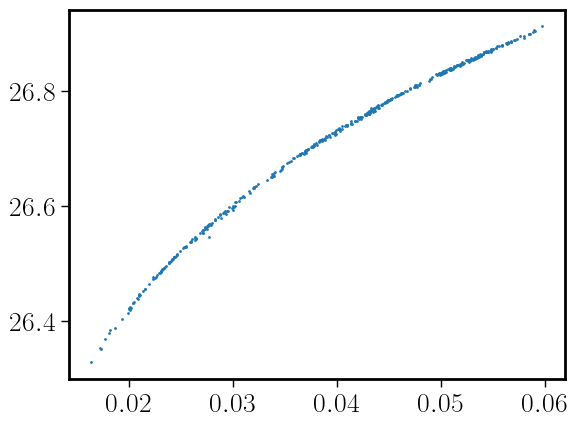

In [97]:
plt.scatter(tab_pe_sel['Z'],np.log10(tab_pe_sel['DL']),s=1)

In [98]:
my_DL = my_cosmo.luminosity_distance(tab_pe_sel['Z'])
KG_DL = KG_cosmo.luminosity_distance(tab_pe_sel['Z'])

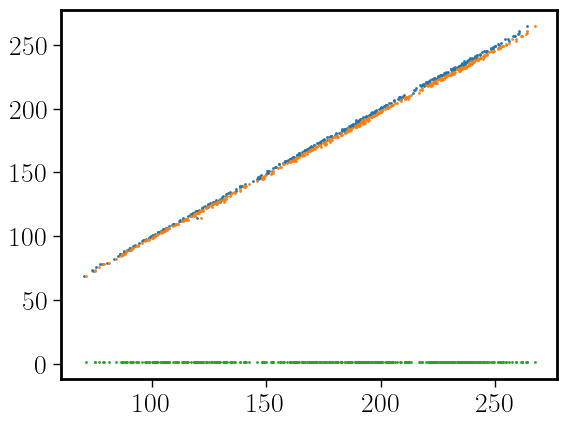

In [99]:
#Mpc2cem = 3.086e22
Mpc2cm = 3.086e24
plt.scatter(my_DL,tab_pe_sel['DL']/Mpc2cm,s=1)
plt.scatter(KG_DL,tab_pe_sel['DL']/Mpc2cm,s=1)
rat_DL = KG_DL/(tab_pe_sel['DL']/Mpc2cm)
plt.scatter(KG_DL,rat_DL,s=1)


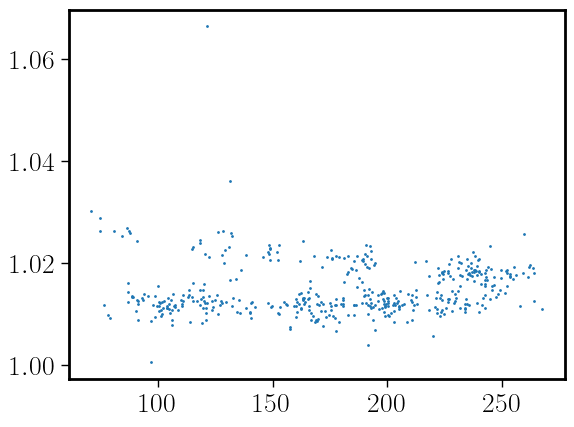

In [100]:
plt.scatter(KG_DL,rat_DL,s=1)

In [101]:
tab_pe_cp = tab_pe_sel.copy()

In [102]:
tab_cols = Table.read('column_names_cosmo.txt',format='csv')

In [103]:
tab_cols

name,n,type
str27,int64,str3
Re_kpc,1,lin
log_SFR_Ha,2,log
log_Mass,2,log
log_SFR_ssp,2,log
DL,1,lin
DA,1,lin
log_Mass_gas,2,log
log_SFR_SF,2,log
log_SFR_D_C,2,log


In [104]:
rat_DL = rat_DL.value

In [105]:
for tab_now in tab_cols:
   col_name = tab_now['name']
   n = tab_now['n']
   ty = tab_now['type']
   print(col_name,n,ty,tab_pe_sel[col_name].dtype,np.nan)
   if (ty == 'lin'):
        tab_pe_cp[col_name] = tab_pe_sel[col_name]*rat_DL**n
   elif (ty == 'log'):
        tab_pe_cp[col_name] = tab_pe_sel[col_name]+ np.log10(rat_DL**n)
   else:
        tab_pe_cp[col_name] = tab_pe_sel[col_name]+ 2.5*np.log10(rat_DL**n)
   mask = (tab_pe_sel[col_name] == -12)
   if (len(tab_pe_cp[col_name][mask])>0):
     tab_pe_cp[col_name][mask] = np.nan




Re_kpc 1 lin >f8 nan
log_SFR_Ha 2 log >f8 nan
log_Mass 2 log >f8 nan
log_SFR_ssp 2 log >f8 nan
DL 1 lin >f8 nan
DA 1 lin >f8 nan
log_Mass_gas 2 log >f8 nan
log_SFR_SF 2 log >f8 nan
log_SFR_D_C 2 log >f8 nan
T30 1 lin >f8 nan
T40 1 lin >f8 nan
T50 1 lin >f8 nan
T60 1 lin >f8 nan
T70 1 lin >f8 nan
T80 1 lin >f8 nan
T90 1 lin >f8 nan
T95 1 lin >f8 nan
T99 1 lin >f8 nan
log_Mass_gas_Av_gas_OH 2 log >f8 nan
log_Mass_gas_Av_ssp_OH 2 log >f8 nan
log_SFR_ssp_100Myr 2 log >f8 nan
log_SFR_ssp_10Myr 2 log >f8 nan
R50_kpc_V 1 lin >f8 nan
R50_kpc_Mass 1 lin >f8 nan
log_Mass_corr_in_R50_V 2 log >f8 nan
log_Mass_gas_Av_gas_log_log 2 log >f8 nan
u_band_abs_mag 2 ln >f8 nan
g_band_abs_mag 2 ln >f8 nan
r_band_abs_mag 2 ln >f8 nan
i_band_abs_mag 2 ln >f8 nan
B_band_abs_mag 2 ln >f8 nan
V_band_abs_mag 2 ln >f8 nan
RJ_band_abs_mag 2 ln >f8 nan
log_Mass_phot 2 log >f8 nan


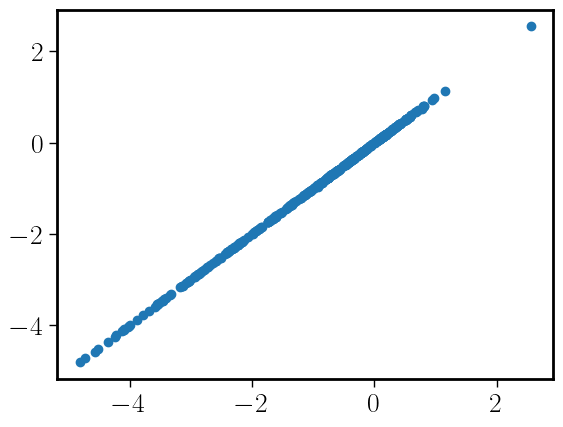

In [106]:
plt.scatter(tab_pe_cp['log_SFR_Ha'],tab_pe_sel['log_SFR_Ha'])

In [107]:
hdu_MaNGA = fits.open('tables/SDSS17Pipe3D_v3_1_1.fits')
hdu_MaNGA.info()

Filename: tables/SDSS17Pipe3D_v3_1_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  GAL_PROPERTIES    1 BinTableHDU   2153   10220R x 536C   [32A, K, 32A, 32A, 32A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

In [108]:
####################################################
# phot-mass was off for SAMI data
####################################################
mKG_manga = np.array(['MaNGA' in name for name in tab_pe_cp['cubename']])
mKG_sami = ~mKG_manga
tab_pe_cp['log_Mass_phot'][mKG_sami] = tab_pe_cp['log_Mass_phot'][mKG_sami]+np.log10(50)
tab_pe_cp['log_Mass_phot'] = tab_pe_cp['log_Mass_phot']-np.log10(0.71**2)


In [109]:
empty_primary = fits.PrimaryHDU()


hdu_KG_sel = fits.BinTableHDU(tab_pe_cp)
hdu_KG_sel.name='Pipe3D'
hdu_list =fits.HDUList([empty_primary,hdu_KG_sel,hdu_MaNGA['MASTAR_CB19_SSP']])
hdu_list.writeto('tables/KG_Pipe3D_table_COSMO.fits',overwrite=True)

In [74]:
tab_Re = ascii.read('tables/global_prop_wNSA.csv')
tab_Re.colnames

['KGAS_ID', 'SURVEY', 'redshift', 'ba', 'sersic_n', 'Re_arcsec', 'Re_kpc']

In [75]:
tab_test = join(tab_pe_cp, tab_Re, keys='KGAS_ID', join_type='left') 

In [76]:
search_col(tab_test,'Re')

Re_kpc_1
ZH_LW_Re_fit
e_ZH_LW_Re_fit
alpha_ZH_LW_Re_fit
e_alpha_ZH_LW_Re_fit
ZH_MW_Re_fit
e_ZH_MW_Re_fit
alpha_ZH_MW_Re_fit
e_alpha_ZH_MW_Re_fit
Age_LW_Re_fit
e_Age_LW_Re_fit
alpha_Age_LW_Re_fit
e_alpha_Age_LW_Re_fit
Age_MW_Re_fit
e_Age_MW_Re_fit
alpha_Age_MW_Re_fit
e_alpha_Age_MW_Re_fit
Re_arc
vel_sigma_Re
e_vel_sigma_Re
log_NII_Ha_Re
e_log_NII_Ha_Re
log_OIII_Hb_Re
e_log_OIII_Hb_Re
log_SII_Ha_Re
e_log_SII_Ha_Re
log_OII_Hb_Re
e_log_OII_Hb_Re
log_OI_Ha_Re
e_log_OI_Ha_Re
EW_Ha_Re
e_EW_Ha_Re
Ha_Hb_Re
e_Ha_Hb_Re
Sigma_Mass_Re
e_Sigma_Mass_Re
ZH_Re_T30
ZH_Re_T40
ZH_Re_T50
ZH_Re_T60
ZH_Re_T70
ZH_Re_T80
ZH_Re_T90
ZH_Re_T95
ZH_Re_T99
vel_disp_Ha_1Re
vel_disp_ssp_1Re
log_Mass_in_Re
Av_gas_Re
e_Av_gas_Re
Av_ssp_Re
e_Av_ssp_Re
Lambda_Re
e_Lambda_Re
V-band_SB_at_Re
error_V-band_SB_at_Re
flux_[OII]3726.03_Re_fit
e_flux_[OII]3726.03_Re_fit
flux_[OII]3728.82_Re_fit
e_flux_[OII]3728.82_Re_fit
flux_HI3734.37_Re_fit
e_flux_HI3734.37_Re_fit
flux_HI3797.9_Re_fit
e_flux_HI3797.9_Re_fit
flux_HeI3888.65_Re_f

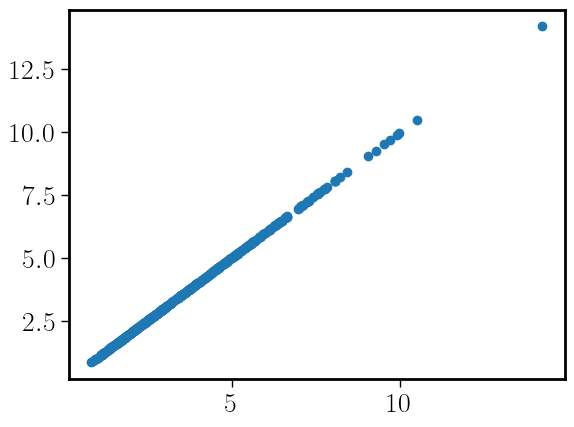

In [77]:
plt.scatter(tab_test['Re_kpc_1'],tab_test['Re_kpc_2'])